                                         
<div id="svm_snap">
    <h1>Credit Card Fraud Detection using Scikit-Learn and Snap ML</h1>
</div>

Snap ML is a high-performance IBM library for ML modeling. It provides highly-efficient CPU/GPU implementations of linear models and tree-based models. Snap ML not only accelerates ML algorithms through system awareness, but also offers novel ML algorithms with best-in-class accuracy.

Machine learning (ML) modeling skills by using two popular classification models to recognize fraudulent credit card transactions. These models are: Decision Tree and Support Vector Machine.

<div id="svm_snap">
    <h3>SetUp</h3>
</div>

For this guided project, we will be using the following libraries:

*   [`pandas`]for managing the data.
*   [`numpy`] for mathematical operations.
*   [`sklearn`]for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`] for visualizing the data.
*   [`matplotlib`] for additional plotting tools.


In [1]:
!pip install snapml


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install numpy==1.26.4 --force-reinstall

  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Import the libraries we need to use in this lab
import warnings
warnings.filterwarnings('ignore')

# from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import gc, sys

In [4]:
# read the input data
raw_data = pd.read_csv("E:\Zidio\Project\creditcard.csv")
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

# display the first rows in the dataset
raw_data.head()

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


*A financial institution may have access to a much larger dataset of transactions. 
To simulate such a case, we will inflate the original one 10 times.*

In [5]:
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


*Each row in the dataset represents a credit card transaction. 
As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. 
Your objective will be to train a model that uses the other variables to predict the value of the Class variable. 
Let's first retrieve basic statistics about the target variable.*

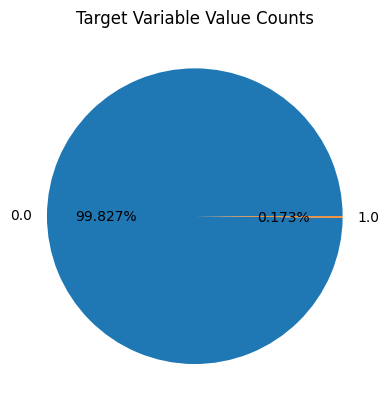

In [6]:
# get the set of distinct classes
labels = big_raw_data.Class.unique()

# get the count of each class
sizes = big_raw_data.Class.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

*As shown above, the Class variable has two values:

0 (the credit card transaction is legitimate)
1 (the credit card transaction is fraudulent)
Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at training time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.*

## Dataset Preprocessing

*Data preprocessing such as scaling/normalization is typically useful for linear models to accelerate the training convergence. We standardize features by removing the mean and scaling to unit variance.*

In [7]:
big_raw_data.iloc[:, 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:, 1:30])
data_matrix = big_raw_data.values

# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:, 1:30]

# y: labels vector
y = data_matrix[:, 30]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (2848070, 29) y.shape= (2848070,)


We are dealing with a large dataset, thus we need to make sure we do not run out of memory. We can release the memory occupied by raw_data and big_raw_data as we do not need them anymore.

In [8]:
del raw_data
del big_raw_data
gc.collect()

0

<div id="dataset_split">
    <h2>Dataset Train/Test Split</h2>
</div>

*Now that the dataset is ready for building the classification models, you need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).*

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


## Decision Trees

*Let's first use Decision Trees for the problem and evaluate the performance of the classifiers from Scikit-learn and Snap ML.*

<div id="dt_sklearn">
    <h3>Build a Decision Tree Classifier with Scikit-Learn</h3>
</div>

We compute the `sample_weights` to be used as input to the training routine so that it takes into account the class imbalance present in this dataset.

In [10]:
w_train = compute_sample_weight('balanced', y_train)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

*Train a Decision Tree Classifier using scikit-learn and use the function **time** to record the training time of our Decision Tree model.*

In [13]:
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  73.61561


<div id="dt_snapml">
    <h3>Build a Decision Tree Classifier with Snap ML</h3>
</div>

Let's import the Decision Tree Classifier Model from **Snap ML**. We can reuse the same sample weights we computed before using the Scikit-learn's `compute_sample_weight` function for training the Decision Tree from Snap ML. The seamless integration of the Snap ML library is possible due to its Scikit-learn Python API compatibility.

Import the Decision Tree Classifier Model from Snap ML:

In [14]:
from snapml import DecisionTreeClassifier

In [15]:
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45)

*Train a Decision Tree Classifier from Snap ML and use the function **time** to record the training time.*

In [16]:
# train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time()-t0
print("[Snap ML] Training time (s):  {0:.5f}".format(snapml_time))

[Snap ML] Training time (s):  17.77168


<div id="dt_sklearn_snapml">
    <h3>Evaluate the Scikit-Learn and Snap ML Decision Tree Classifiers</h3>
</div>

*Let's examine the Snap ML vs Scikit-Learn training speedup for the Decision Tree Classifier:*

In [17]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : {0:.2f}x '.format(training_speedup))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup : 4.14x 


*Let's run inference on both classifiers and compute the probabilities of the test samples belonging to the class of fraudulent transactions.*

In [18]:
sklearn_pred = sklearn_dt.predict_proba(X_test)[:,1]
snapml_pred = snapml_dt.predict_proba(X_test)[:,1]

We evaluate the Compute Area Under the Receiver Operating Characteristic Curve, the **ROC-AUC score** of the predictions of both classifiers:


In [19]:
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

snapml_roc_auc = roc_auc_score(y_test, snapml_pred)   
print('[Snap ML] ROC-AUC score : {0:.3f}'.format(snapml_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.966
[Snap ML] ROC-AUC score : 0.966


As shown above, both Decision Tree classifiers provide the same score on the test dataset. 

However Snap ML runs the training routine multiple times faster than Scikit-Learn. This is one of the advantages of using Snap ML: **acceleration of training of classical machine learning models, such as linear and tree-based models**. 

## Support Vector Machines

We now use the Support Vector Machine (SVM) models for the problem and evaluate the performance of the models from Scikit-learn and Snap ML.

Build a Support Vector Machine model with Scikit-Learn

<div id="svm_sklearn">
    <h3>Build a Support Vector Machine model with Scikit-Learn</h3>
</div>
    

In [20]:
from sklearn.svm import LinearSVC

Instatiate a scikit-learn SVM model. To indicate the class imbalance at training time, set class_weight='balanced'.

In [21]:
sklearn_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

Train a linear Support Vector Machine model using Scikit-Learn:

In [22]:
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  164.61


<div id="svm_snap">
    <h3>Build a Support Vector Machine model with Snap ML</h3>
</div>

Import the Support Vector Machine model (SVM) from Snap ML:


In [23]:
from snapml import SupportVectorMachine

In contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs. To use the GPU, set use_gpu = True. To set the number of threads used at training time, one needs to set the n_jobs parameter.

In [24]:
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
print(snapml_svm.get_params())

{'class_weight': 'balanced', 'device_ids': [], 'fit_intercept': False, 'gamma': 1.0, 'generate_training_history': None, 'intercept_scaling': 1.0, 'kernel': 'linear', 'loss': 'hinge', 'max_iter': 1000, 'n_components': 100, 'n_jobs': 4, 'normalize': False, 'random_state': 25, 'regularizer': 1.0, 'tol': 0.001, 'use_gpu': False, 'verbose': False}


Train an SVM model using Snap ML:

In [25]:
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  33.11


<div id="svm_sklearn_snap">
    <h3>Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</h3>
</div>

Let's examine the Snap ML vs Scikit-Learn training speedup for the SVM models:

In [26]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 4.97x 


Let's run inference on both models and get the confidence scores of the test samples. 

In [27]:
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred = snapml_svm.decision_function(X_test)

We evaluate the **ROC-AUC score** of the predictions of both models:

In [28]:
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Scikit-Learn] ROC-AUC score:   0.984
[Snap ML] ROC-AUC score:   0.985
